# SMA analysis
Purpose: find best representation of SMA such that there is little correlation with actual price

In [46]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.trend import SMAIndicator
from ctarget import get_target
import usefulfunctions as uf

In [47]:
df = pd.read_csv("../data/BTCUSDT-hour.csv")

In [48]:
# df.head()

In [49]:
# Simple moving indicator
def get_sma(p=[20, 50, 200], get_diff=True, get_rate=True):
    """
    adds sma indicators to df
    p is period, recommended is [20, 50, 200]
    """
    for i in p:
        sma = SMAIndicator(close=df["close"], window=i)
        name = "sma_" + str(i)
        df[name]=sma.sma_indicator()
    if get_diff:
        get_sma_diff(p)
    if get_rate:
        get_sma_rate(p)

In [50]:
# Simple moving indicator difference from close
def get_sma_diff(p=[20, 50, 200]):
    """
    adds sma-close
    """
    for i in p:
        c = df["close"]
        sma = SMAIndicator(close=c, window=i)
        s = sma.sma_indicator()
        result = list(map(lambda x, y: x - y, c, s))
        name = "sma_diff_" + str(i)
        df[name] = result

In [51]:
# SMA rate
def get_sma_rate(p=[20, 50, 200]):
    """
    adds sma rate by taking difference: close-previous_close (for SMAs)
    """
    for i in p:
        sma = SMAIndicator(close=df["close"], window=i)
        now = sma.sma_indicator()
        past = now.shift(1)
        name = "rate_sma_" + str(i)
        df[name] = list(map(none_subtraction, now, past))
        
def none_subtraction(x, y):
    """
    returns x-y and None if either are None
    """
    if x is None or y is None:
        return None
    else:
        return x-y

In [52]:
get_sma([1000])

In [53]:
# fig,ax = plt.subplots(figsize=(20, 10))
# ax.plot(df.timestamp,
#         df.sma_50,
#         color="green")
# ax.set_xlabel("time")
# ax.set_ylabel("target")

# ax.tick_params(labelbottom=False)    
# ax.axes.xaxis.set_visible(False)

# ax2=ax.twinx()
# ax2.plot(df.timestamp,
#          df["rs-diff-20"],
#          color="lightgreen")
# ax2.axhline(y=0, color='darkgreen', linestyle='-')

# ax3=ax.twinx()
# ax3.plot(df.timestamp,
#          df.sma_diff_50,
#          color="gray")

# ax4=ax.twinx()
# ax4.plot(df.timestamp,
#          df.close,
#          color="black")

# ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
# plt.show()

In [54]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore', 'sma_1000',
       'sma_diff_1000', 'rate_sma_1000'],
      dtype='object')

In [34]:
# Difference between SMA difference and rate of SMA
# - Keep only one of rsd or srd because they're opposites

df["rsd_200"] = list(map(lambda x, y: uf.log_abs(x-y),df["rate_sma_200"], df["sma_diff_200"]))
df["rsd_50"] = list(map(lambda x, y: uf.log_abs(x-y),df["rate_sma_50"], df["sma_diff_50"]))
df["rsd_20"] = list(map(lambda x, y: uf.log_abs(x-y),df["rate_sma_20"], df["sma_diff_20"]))

In [35]:
df["rsd_200_r"] = uf.get_rate(df["rsd_200"])
df["rsd_50_r"] = uf.get_rate(df["rsd_200"])
df["rsd_20_r"] = uf.get_rate(df["rsd_200"])

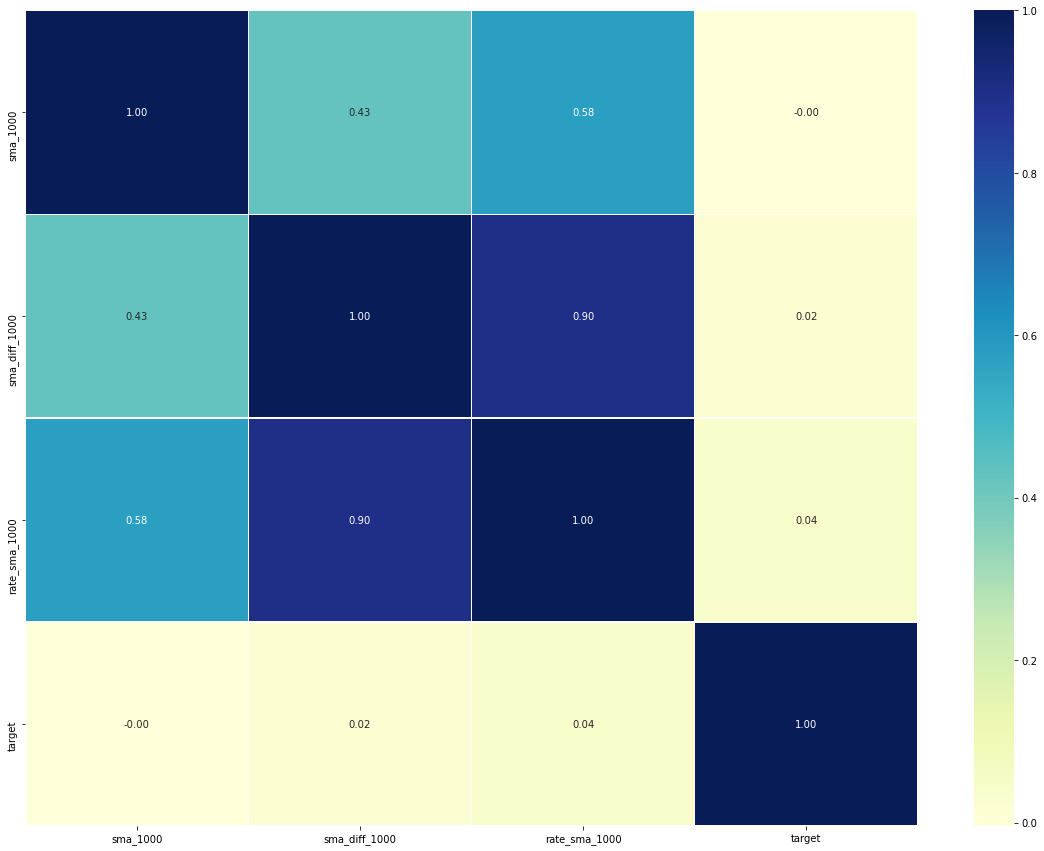

In [55]:
# Make a correlation matrix

d = df.drop(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore'], axis=1)
d["target"] = get_target(df, span=200, cutoff_at=0.65)
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
# fig.savefig('corr-matrix.png')

In [37]:
dplot = df
dplot["target"] = get_target(df, span=200, cutoff_at=0.65)
dp = dplot[800:5200]

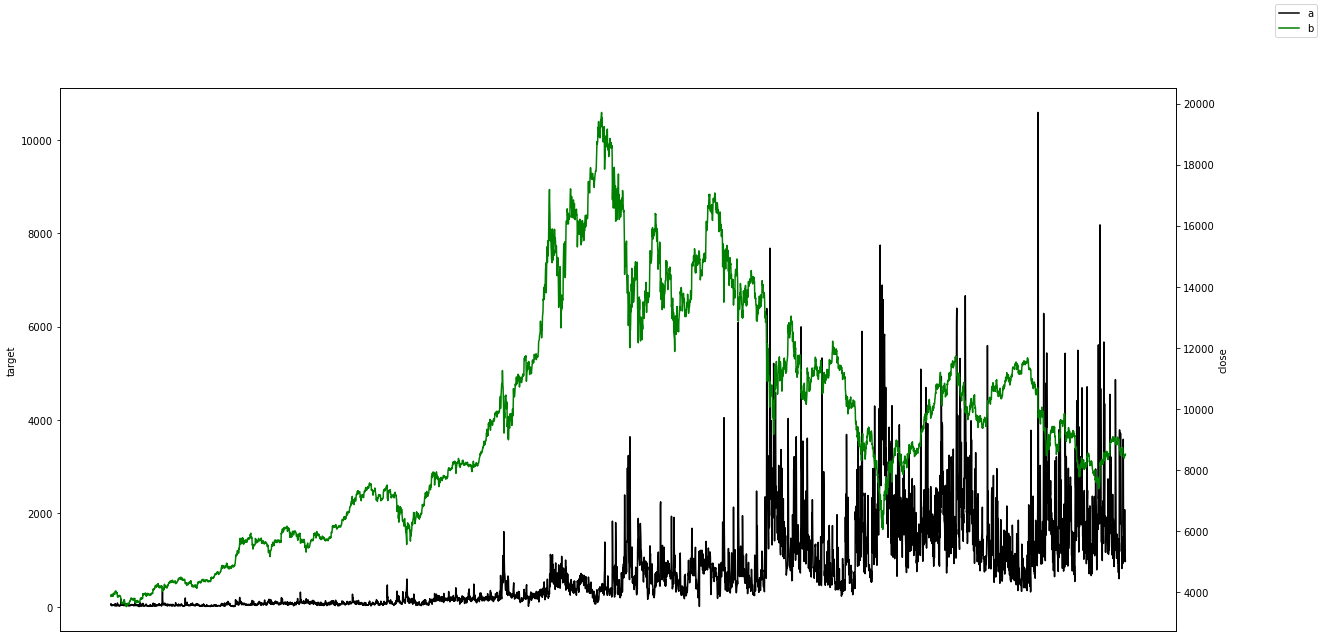

In [56]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(dp.timestamp,
        dp.volume,
        color="black")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax2.plot(dp.timestamp,
         dp.close,
         color="green")
# ax2.axhline(y=0, color='darkgreen', linestyle='-')

ax2.set_ylabel("close")
fig.legend(["a", "b", "c", "d"])
plt.show()